In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#don't run this part
%cd gdrive/My\ Drive/data

/content/gdrive/My Drive/data


In [ ]:
import tweepy
import json
import pandas as pd
import pickle
import csv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# WorldPoetryDay = pd.read_csv('WorldPoetryDay.csv')
Dataset = pd.read_csv('FinalDataset.csv')

Dataset = Dataset.iloc[:,:]
# print(Dataset.info)
print(type(Dataset))
# print(Dataset.dtypes)
# Dataset = pd.DataFrame(Dataset)
# Dataset = Dataset.astype({'favorite_count': int})
# Dataset['favorite_count'] = Dataset['favorite_count'].apply(pd.to_numeric)
# Dataset[:,'favorite_count'] = Dataset[:,'favorite_count'].astype('i')
# Dataset['favorite_count'] = Dataset['favorite_count'].astype(int)
print(Dataset.dtypes)
print(Dataset)

<class 'pandas.core.frame.DataFrame'>
Unnamed: 0          int64
created_at         object
res                 int64
full_text          object
screen_name        object
followers_count     int64
friends_count       int64
retweet_count       int64
favorite_count      int64
Hashtag            object
dtype: object
      Unnamed: 0  ...            Hashtag
0           1488  ...  godzillavskong  .
1           1808  ...         MartyrsDay
2            733  ...          GNCTDBill
3            111  ...        snyderscut.
4            873  ...     instagramdown.
...          ...  ...                ...
9464        2535  ...  godzillavskong  .
9465        1975  ...        snyderscut.
9466        1540  ...          GNCTDBill
9467        1670  ...          GNCTDBill
9468        2522  ...   instagramdown  .

[9469 rows x 10 columns]


In [ ]:
DatasetNp = Dataset.to_numpy()
# print(DatasetNp[0][8])

DatasetNp[:,8] = DatasetNp[:,8].astype('i')

# print(DatasetNp.shape)
# X, y = WorldPoetryDayNp[:,[2,4,15,22,23]],WorldPoetryDayNp[:,0]
X, y = DatasetNp[:,3],DatasetNp[:,2]
retweetFavCountX = DatasetNp[:,[5,6,7,8]]
retweetFavCountX = retweetFavCountX.astype('f') 
# print(X.shape)
# print(y.shape)
# print(retweetFavCountX.shape)
# print(X[:5])
# print(y[:5])
Xn = []
yn = []
rtn = []
for i in range(len(X)):
  # print(y[i])
  # print(int(y[i]))
  if((y[i] == 0 or y[i] == 1) and int(y[i]) >= 2):
    continue
  else:
    Xn.append(X[i])
    yn.append(y[i])
    rtn.append(retweetFavCountX[i])
  # break
X = np.array(Xn); y = np.array(yn); retweetFavCountX = np.array(rtn)
print(X.shape)
print(y.shape)
print(retweetFavCountX.shape)
print(X[:5])
print(y[:5])
print(retweetFavCountX[:5])
# print(y.unique())

(9469,)
(9469,)
(9469, 4)
['RT @IgnacioDiMeglio: THE REAL SHOWDOWN IS HERE! #GodzillaVsKong is a thing of the past. It´s time for #Killeroo Vs #GorillaMyDreams. Killer…'
 'RT @ankush_prashar: On #ShaheedDiwas, great salute to our martyrs #BhagatSingh #Sukhdev &amp; #Rajguru who laid down their lives for the freedo…'
 'RT @MANJULtoons: #GNCTDBill\nMy #cartoon for @firstpost\nTelegram: https://t.co/0zuidcPdqY https://t.co/AAD6fyoaaR'
 'RT @Nadeshot: Wow, #SnydersCut Justice League was absolutely phenomenal. Well worth the wait, all my expectations for the film were blown a…'
 'RT @rishabh_memes: #instagramdown \nAfter going down Instagram coming back online be like : https://t.co/jqrPyNmtHe']
[1 1 0 1 1]
[[ 397.  804.    5.    0.]
 [  89.   28.    3.    0.]
 [ 252.  466.  170.    0.]
 [  71.  674.  392.    0.]
 [2484. 1335.   69.   69.]]


1    8653
0     816
Name: 0, dtype: int64


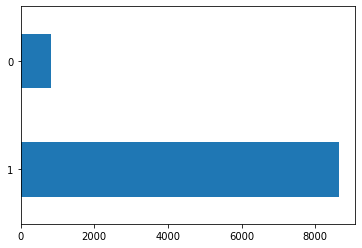

In [ ]:
#plotting class frequency
label = pd.DataFrame(y)
classFreq = label[0].value_counts()
print(classFreq)
classFreq.plot.barh()
plt.show()

In [ ]:
#run down sampling or up sampling code
#for down samplling uncomment below code

# length = len(X)
# Xn = []; yn = []
# for i in range(length):
#   if(y[i] == 0):
#     yn.append(y[i])
#     Xn.append(X[i])
#     userX.append(retweetFavCountX[i])

# for i in range(4*len(Xn)+20):
#   if(y[i] == 1):
#     yn.append(y[i])
#     Xn.append(X[i])
#     userX.append(retweetFavCountX[i])

# X = np.array(Xn); y = np.array(yn); retweetFavCountX = np.array(userX)
# print(y)


In [ ]:
# up sampling 
length = len(X)
Xn = []; yn = []; userX = []
for i in range(6):
  for i in range(length):
    if(y[i] == 0):
      yn.append(y[i])
      Xn.append(X[i])
      userX.append(retweetFavCountX[i])
for i in range(length):
  if(y[i] == 1):
    yn.append(y[i])
    Xn.append(X[i])
    userX.append(retweetFavCountX[i])

X = np.array(Xn); y = np.array(yn); retweetFavCountX = np.array(userX)
print(y)

[0 0 0 ... 1 1 1]


1    8653
0    4896
Name: 0, dtype: int64


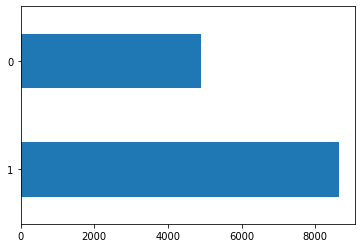

In [ ]:
#plotting class frequency after up/down samplling
label = pd.DataFrame(y)
classFreq = label[0].value_counts()
print(classFreq)
classFreq.plot.barh()
plt.show()

# Other Feature Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(retweetFavCountX, y, test_size=0.33, stratify = y, random_state=37)
print(X_train.shape)
print(X_test.shape)

(9077, 4)
(4472, 4)


In [ ]:
#applying different models
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
MNBclf = MultinomialNB(class_prior = [0.5, 0.5])
y_train = y_train.astype('i')
print(y_train.dtype)
MNBclf.fit(X_train, y_train)

y_pred = MNBclf.predict(X_test)
print("shape of y pred",y_pred.shape)
print("shape of y test",y_test.shape)
print(y_pred[:100])
print(y_test[:100])
y_test = y_test.astype('i')
print("Accuracy: ",accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))
# X_trainT
#saving model then reading it again
pickle.dump(MNBclf, open('otherFeatureMNBclfModel.sav', 'wb'))
MNBclf = pickle.load(open('otherFeatureMNBclfModel.sav', 'rb'))

int32
shape of y pred (4472,)
shape of y test (4472,)
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1]
Accuracy:  0.4349284436493739
[[1542   74]
 [2453  403]]
              precision    recall  f1-score   support

           0       0.39      0.95      0.55      1616
           1       0.84      0.14      0.24      2856

    accuracy                           0.43      4472
   macro avg       0.62      0.55      0.40      4472
weighted avg       0.68      0.43      0.35      4472



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

LOGclf = LogisticRegression(random_state=0, n_jobs = -1, max_iter = 1000, verbose= 2)
LOGclf.fit(X_train, y_train)

y_pred = LOGclf.predict(X_test)

#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(LOGclf, open('otherFeatureLOGclfModel.sav', 'wb'))
LOGclf = pickle.load(open('otherFeatureLOGclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing accuracy: 0.3613595706618962
[[1616    0]
 [2856    0]]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53      1616
           1       0.00      0.00      0.00      2856

    accuracy                           0.36      4472
   macro avg       0.18      0.50      0.27      4472
weighted avg       0.13      0.36      0.19      4472



In [ ]:
from sklearn.neighbors import KNeighborsClassifier #take more than 3 min (1m2s 75), (27m, 90.8%)
KNNclf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)
KNNclf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = KNNclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(KNNclf, open('otherFeatureKNNclfModel.sav', 'wb'))
KNNclf = pickle.load(open('otherFeatureKNNclfModel.sav', 'rb'))

Testing accuracy: 0.8866279069767442
[[1522   94]
 [ 413 2443]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1616
           1       0.96      0.86      0.91      2856

    accuracy                           0.89      4472
   macro avg       0.87      0.90      0.88      4472
weighted avg       0.90      0.89      0.89      4472



In [ ]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
GNBclf.fit(X_train, y_train)
y_pred = GNBclf.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(GNBclf, open('otherFeatureGNBclfModel.sav', 'wb'))
GNBclf = pickle.load(open('otherFeatureGNBclfModel.sav', 'rb'))

Accuracy:  0.3620304114490161
[[1616    0]
 [2853    3]]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53      1616
           1       1.00      0.00      0.00      2856

    accuracy                           0.36      4472
   macro avg       0.68      0.50      0.27      4472
weighted avg       0.77      0.36      0.19      4472



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
SVMclf = SVC(probability=False,random_state=1, kernel='rbf')
SVMclf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = SVMclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(SVMclf, open('otherFeatureSVMclfModel.sav', 'wb'))
SVMclf = pickle.load(open('otherFeatureSVMclfModel.sav', 'rb'))

Testing accuracy: 0.6386404293381037
[[   0 1616]
 [   0 2856]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1616
           1       0.64      1.00      0.78      2856

    accuracy                           0.64      4472
   macro avg       0.32      0.50      0.39      4472
weighted avg       0.41      0.64      0.50      4472



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier  #5s 78%
RFclf = RandomForestClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)
RFclf.fit(X_train, y_train)

y_pred = RFclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#12>89.44
#20>95.7
#100, 40, 95.8
#100, 35, 95.88
#100, pca30, 92
#100, w/oPcA 400, 96.03
#saving model then reading it again
pickle.dump(RFclf, open('otherFeatureRFclfModel.sav', 'wb'))
RFclf = pickle.load(open('otherFeatureRFclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    7.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.5s finished


Testing accuracy: 0.9798747763864043
[[1602   14]
 [  76 2780]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1616
           1       0.99      0.97      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.97      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier  #5s 78%
ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)
ETclf.fit(X_train, y_train)

y_pred = ETclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#12>89.44
#20>95.7
#100, 40, 95.8
#100, 35, 95.88
#100, pca30, 92
#100, w/oPcA 400, 96.03
#saving model then reading it again
pickle.dump(ETclf, open('otherFeatureETclfModel.sav', 'wb'))
ETclf = pickle.load(open('otherFeatureETclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.7s finished


Testing accuracy: 0.9814400715563506
[[1602   14]
 [  69 2787]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1616
           1       1.00      0.98      0.99      2856

    accuracy                           0.98      4472
   macro avg       0.98      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472



In [ ]:
from sklearn.neural_network import MLPClassifier #(1m 48s 70)
MLPclf = MLPClassifier(batch_size = 512, early_stopping=True, hidden_layer_sizes=(256,128,64,32,16), random_state=37 ,max_iter=450, learning_rate_init=0.01, tol=0.0000001,n_iter_no_change = 20) #verbose = True
MLPclf.fit(X_train, y_train)
# Predicting the Test set results
# print(X_train.shape)
y_pred = MLPclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

pickle.dump(MLPclf, open('otherFeaturebestMLPModel.sav', 'wb'))
MLPclf = pickle.load(open('otherFeaturebestMLPModel.sav', 'rb'))

Testing accuracy: 0.667262969588551
[[ 186 1430]
 [  58 2798]]
              precision    recall  f1-score   support

           0       0.76      0.12      0.20      1616
           1       0.66      0.98      0.79      2856

    accuracy                           0.67      4472
   macro avg       0.71      0.55      0.49      4472
weighted avg       0.70      0.67      0.58      4472



In [ ]:
from xgboost import XGBClassifier #(1m 14s 78)
XGBclf = XGBClassifier(max_depth = 15, n_estimators = 2000, n_jobs = -1,random_state=37, verbosity=1)
XGBclf.fit(X_train, y_train)
y_pred = XGBclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(XGBclf, open('otherFeatureXGBclfModel.sav', 'wb'))
XGBclf = pickle.load(open('otherFeatureXGBclfModel.sav', 'rb'))

Testing accuracy: 0.976520572450805
[[1602   14]
 [  91 2765]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1616
           1       0.99      0.97      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.97      0.98      0.97      4472
weighted avg       0.98      0.98      0.98      4472



In [ ]:
from sklearn.ensemble import AdaBoostClassifier  #1m 54s 67
ADBclf = AdaBoostClassifier(n_estimators=10000, random_state=37, learning_rate = 0.1, algorithm='SAMME')
ADBclf.fit(X_train, y_train)
y_pred = ADBclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test,y_pred))
#0.8,1000 > 88.95
#0.8, 100 > 82
#1, 100 > 84.3
#saving model then reading it again
pickle.dump(ADBclf, open('otherFeatureADBclfModel.sav', 'wb'))
ADBclf = pickle.load(open('otherFeatureADBclfModel.sav', 'rb'))

Testing accuracy: 0.787567084078712
[[ 738  878]
 [  72 2784]]
              precision    recall  f1-score   support

           0       0.91      0.46      0.61      1616
           1       0.76      0.97      0.85      2856

    accuracy                           0.79      4472
   macro avg       0.84      0.72      0.73      4472
weighted avg       0.81      0.79      0.77      4472



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #6 min #13s 69 #2m6s 73
GBclf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.2,max_depth=5, random_state=37, verbose = 1)
GBclf.fit(X_train, y_train)
y_pred = GBclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test,y_pred))
#saving model then reading it again
pickle.dump(GBclf, open('otherFeatureGBclfModel.sav', 'wb'))
GBclf = pickle.load(open('otherFeatureGBclfModel.sav', 'rb'))
#89

      Iter       Train Loss   Remaining Time 
         1           1.1671            1.04m
         2           1.0744           58.75s
         3           1.0069           57.81s
         4           0.9581           57.30s
         5           0.9219           57.08s
         6           0.8912           58.53s
         7           0.8662           59.83s
         8           0.8453           59.74s
         9           0.8300           59.43s
        10           0.8136           59.19s
        20           0.7163           57.17s
        30           0.6330           56.63s
        40           0.5755           56.42s
        50           0.5218           55.89s
        60           0.4787           55.49s
        70           0.4354           55.47s
        80           0.4097           55.43s
        90           0.3830           55.22s
       100           0.3561           55.37s
       200           0.1906           53.77s
       300           0.1187           52.28s
       40

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier 
RFclf = RandomForestClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)

from sklearn.ensemble import ExtraTreesClassifier
# ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 500, criterion = 'gini', n_jobs = -1,max_samples=0.8,max_features=6,random_state=37)
ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)


from sklearn.naive_bayes import MultinomialNB
MNBclf = MultinomialNB()

from sklearn.neighbors import KNeighborsClassifier #take more than 3 min
KNNclf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)

from sklearn.neural_network import MLPClassifier #
MLPclf = MLPClassifier(batch_size = 512, early_stopping=True, hidden_layer_sizes=(256,128,64,32,16), random_state=37 ,max_iter=450, learning_rate_init=0.01, tol=0.0000001,n_iter_no_change = 20) #, verbose = True

from sklearn.linear_model import LogisticRegression #
LOGclf = LogisticRegression(random_state=0, n_jobs = -1, max_iter = 200, verbose= 1)

from sklearn.svm import SVC #
SVMclf = SVC(probability=False,random_state=1, kernel='rbf')

from xgboost import XGBClassifier #
XGBclf = XGBClassifier(max_depth = 15, n_estimators = 10000, n_jobs = -1,random_state=37, verbosity=1)

from sklearn.ensemble import AdaBoostClassifier
ADBclf = AdaBoostClassifier(n_estimators=30000, random_state=37, learning_rate = 0.1, algorithm='SAMME')

from sklearn.ensemble import GradientBoostingClassifier #6 min
GBclf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.2,max_depth=5, random_state=37, verbose = 1)


from sklearn.ensemble import VotingClassifier
otherFeatureclf = VotingClassifier(estimators=[('RFclf', RFclf),('ETclf', ETclf),('KNNclf', KNNclf),('XGBclf', XGBclf),  ('GBclf', GBclf),  ('ADBclf', ADBclf)], voting='hard', weights=[2,2,2,2,2,1], flatten_transform=True)
otherFeatureclf.fit(X_train, y_train)
y_pred_otherFeature = otherFeatureclf.predict(X_test)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred_otherFeature)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred_otherFeature))  
print(classification_report(y_test,y_pred_otherFeature))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 390 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.1s finished


      Iter       Train Loss   Remaining Time 
         1           1.1671            1.06m
         2           1.0744            1.00m
         3           1.0069           58.69s
         4           0.9581           57.97s
         5           0.9219           57.82s
         6           0.8912           57.61s
         7           0.8662           57.39s
         8           0.8453           57.26s
         9           0.8300           57.32s
        10           0.8136           57.27s
        20           0.7163           56.81s
        30           0.6330           56.04s
        40           0.5755           56.50s
        50           0.5218           55.98s
        60           0.4787           56.19s
        70           0.4354           56.15s
        80           0.4097           56.30s
        90           0.3830           56.15s
       100           0.3561           56.08s
       200           0.1906           53.80s
       300           0.1187           52.55s
       40

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.7s finished


Testing accuracy: 0.9805456171735242
[[1602   14]
 [  73 2783]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1616
           1       0.99      0.97      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.98      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472



In [ ]:
otherFeatureclf.fit(retweetFavCountX, y)

#saving model then reading it again
pickle.dump(otherFeatureclf, open('otherFeaturefinalBestModel.sav', 'wb'))
otherFeatureclf = pickle.load(open('otherFeaturefinalBestModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.1s finished


      Iter       Train Loss   Remaining Time 
         1           1.1724            1.39m
         2           1.0779            1.35m
         3           1.0127            1.34m
         4           0.9630            1.33m
         5           0.9262            1.33m
         6           0.8958            1.33m
         7           0.8724            1.32m
         8           0.8526            1.32m
         9           0.8395            1.32m
        10           0.8231            1.32m
        20           0.7250            1.32m
        30           0.6351            1.31m
        40           0.5865            1.31m
        50           0.5401            1.30m
        60           0.4958            1.31m
        70           0.4624            1.31m
        80           0.4257            1.30m
        90           0.3972            1.30m
       100           0.3713            1.29m
       200           0.2025            1.27m
       300           0.1306            1.24m
       40

# With count vectorizer

In [ ]:
import glob
import nltk
import string
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def preprocessing(doc):
  puncd = {  }
  for i in string.punctuation:
    puncd[i] = ' '
  doc = doc.translate(str.maketrans(puncd))                     #replacing the punctuation marks with white spaces. 
  doc = doc.strip()                                             #removing the extra white space characters. 
  doc = doc.lower()                                             #making the string to lower case letters. 

  tokens = word_tokenize(doc)                                         #tokenise the words to a list. 
  tokens_NoStop = [i for i in tokens if i not in stop_words]                #removing the stop words from the tokenised list. 
  lemmatizer=WordNetLemmatizer()
  lemmedWordtext = []
  for i in range(len(tokens_NoStop)):
    lemmedWordtext.append(lemmatizer.lemmatize(tokens_NoStop[i]))           #appending the lemmatized word in the list
  return lemmedWordtext
Xnew = []
for i in range(len(X)):
  preProcessed = preprocessing(X[i])
  # print(preProcessed)
  # preProcessed.append(X[i][1])
  # preProcessed.append(X[i][2])
  Xnew.append(preProcessed)

print(Xnew[:5])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[['rt', 'manjultoons', 'gnctdbill', 'cartoon', 'firstpost', 'telegram', 'http', 'co', '0zuidcpdqy', 'http', 'co', 'aad6fyoaar'], ['rt', 'saahilmenghani', 'number', 'shoot', 'farmersprotest', 'site', 'young', 'farmer', 'arrive', 'village', 'martyrsday', 'शहीद', 'दिवस', 'singhu…'], ['rt', 'saahilmenghani', 'number', 'shoot', 'farmersprotest', 'site', 'young', 'farmer', 'arrive', 'village', 'martyrsday', 'शहीद', 'दिवस', 'singhu…'], ['started', 'trending', 'pakistan', 'instagramdown', 'ufff', 'happiest', 'great', 'job', 'sheikh', 'nawaz', 'sharif', 'louis', 'tomlinson', 'selena', 'hayeee', 'trump', 'itne', 'china', 'islam', 'south', 'punjab', 'almighty', 'allah', 'dm', 'a

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state=37)
print(X_train.shape)
print(X_test.shape)

(9077,)
(4472,)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.feature_extraction.text import CountVectorizer             #vectorizing text data
vectorizer = CountVectorizer(tokenizer = preprocessing)#,stop_words=stop_words
X_trainT = vectorizer.fit_transform(X_train)
features = vectorizer.get_feature_names()
print("No of features after vectorizing X_train:", len(features))
X_testT  = vectorizer.transform(X_test)
print("shape of X_trainT:", X_trainT.shape)
X_T = vectorizer.fit_transform(X)

No of features after vectorizing X_train: 10685
shape of X_trainT: (9077, 10685)


In [ ]:
#applying different models
from sklearn.naive_bayes import MultinomialNB
MNBclf = MultinomialNB(class_prior = [0.5, 0.5])
y_train = y_train.astype('i')
print(y_train.dtype)
MNBclf.fit(X_trainT, y_train)

y_pred = MNBclf.predict(X_testT)
print("shape of y pred",y_pred.shape)
print("shape of y test",y_test.shape)
print(y_pred[:100])
print(y_test[:100])
y_test = y_test.astype('i')
print("Accuracy: ",accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))
# X_trainT
#saving model then reading it again
pickle.dump(MNBclf, open('MNBclfModel.sav', 'wb'))
MNBclf = pickle.load(open('MNBclfModel.sav', 'rb'))

int32
shape of y pred (4472,)
shape of y test (4472,)
[1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0
 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0]
[1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1]
Accuracy:  0.9579606440071556
[[1552   64]
 [ 124 2732]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1616
           1       0.98      0.96      0.97      2856

    accuracy                           0.96      4472
   macro avg       0.95      0.96      0.95      4472
weighted avg       0.96      0.96      0.96      4472



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

LOGclf = LogisticRegression(random_state=0, n_jobs = -1, max_iter = 1000, verbose= 2)
LOGclf.fit(X_trainT, y_train)

y_pred = LOGclf.predict(X_testT)

#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(LOGclf, open('LOGclfModel.sav', 'wb'))
LOGclf = pickle.load(open('LOGclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Testing accuracy: 0.9780858676207513
[[1580   36]
 [  62 2794]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1616
           1       0.99      0.98      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.97      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472



In [ ]:
from sklearn.neighbors import KNeighborsClassifier #take more than 3 min (1m2s 75), (27m, 90.8%)
KNNclf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)
KNNclf.fit(X_trainT, y_train)
# Predicting the Test set results
y_pred = KNNclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(KNNclf, open('KNNclfModel.sav', 'wb'))
KNNclf = pickle.load(open('KNNclfModel.sav', 'rb'))

Testing accuracy: 0.9279964221824687
[[1556   60]
 [ 262 2594]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1616
           1       0.98      0.91      0.94      2856

    accuracy                           0.93      4472
   macro avg       0.92      0.94      0.92      4472
weighted avg       0.93      0.93      0.93      4472



In [ ]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
GNBclf.fit(X_trainT.toarray(), y_train)
y_pred = GNBclf.predict(X_testT.toarray())

print("Accuracy: ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(GNBclf, open('GNBclfModel.sav', 'wb'))
GNBclf = pickle.load(open('GNBclfModel.sav', 'rb'))

Accuracy:  0.8678443649373881
[[1616    0]
 [ 591 2265]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1616
           1       1.00      0.79      0.88      2856

    accuracy                           0.87      4472
   macro avg       0.87      0.90      0.87      4472
weighted avg       0.90      0.87      0.87      4472



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
SVMclf = SVC(probability=False,random_state=1, kernel='rbf')
SVMclf.fit(X_trainT, y_train)
# Predicting the Test set results
y_pred = SVMclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(SVMclf, open('SVMclfModel.sav', 'wb'))
SVMclf = pickle.load(open('SVMclfModel.sav', 'rb'))

Testing accuracy: 0.9787567084078712
[[1570   46]
 [  49 2807]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1616
           1       0.98      0.98      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.98      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472



In [ ]:
from sklearn.ensemble import RandomForestClassifier  #5s 78%
RFclf = RandomForestClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)
RFclf.fit(X_trainT, y_train)

y_pred = RFclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#12>89.44
#20>95.7
#100, 40, 95.8
#100, 35, 95.88
#100, pca30, 92
#100, w/oPcA 400, 96.03
#saving model then reading it again
pickle.dump(RFclf, open('RFclfModel.sav', 'wb'))
RFclf = pickle.load(open('RFclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.6s finished


Testing accuracy: 0.9237477638640429
[[1305  311]
 [  30 2826]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      1616
           1       0.90      0.99      0.94      2856

    accuracy                           0.92      4472
   macro avg       0.94      0.90      0.91      4472
weighted avg       0.93      0.92      0.92      4472



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier  #5s 78%
ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)
ETclf.fit(X_trainT, y_train)

y_pred = ETclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#12>89.44
#20>95.7
#100, 40, 95.8
#100, 35, 95.88
#100, pca30, 92
#100, w/oPcA 400, 96.03
#saving model then reading it again
pickle.dump(ETclf, open('ETclfModel.sav', 'wb'))
ETclf = pickle.load(open('ETclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.6s finished


Testing accuracy: 0.9116726296958855
[[1249  367]
 [  28 2828]]
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1616
           1       0.89      0.99      0.93      2856

    accuracy                           0.91      4472
   macro avg       0.93      0.88      0.90      4472
weighted avg       0.92      0.91      0.91      4472



In [ ]:
from sklearn.neural_network import MLPClassifier #(1m 48s 70)
MLPclf = MLPClassifier(batch_size = 512, early_stopping=True, hidden_layer_sizes=(256,128,64,32,16), random_state=37 ,max_iter=450, learning_rate_init=0.01, tol=0.0000001,n_iter_no_change = 20) #verbose = True
MLPclf.fit(X_trainT, y_train)
# Predicting the Test set results
# print(X_train.shape)
y_pred = MLPclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

pickle.dump(MLPclf, open('bestMLPModel.sav', 'wb'))
MLPclf = pickle.load(open('bestMLPModel.sav', 'rb'))

Testing accuracy: 0.9780858676207513
[[1585   31]
 [  67 2789]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1616
           1       0.99      0.98      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.97      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472



In [ ]:
from xgboost import XGBClassifier #(1m 14s 78)
XGBclf = XGBClassifier(max_depth = 15, n_estimators = 2000, n_jobs = -1,random_state=37, verbosity=1)
XGBclf.fit(X_trainT, y_train)
y_pred = XGBclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(XGBclf, open('XGBclfModel.sav', 'wb'))
XGBclf = pickle.load(open('XGBclfModel.sav', 'rb'))

Testing accuracy: 0.9762969588550984
[[1588   28]
 [  78 2778]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1616
           1       0.99      0.97      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.97      0.98      0.97      4472
weighted avg       0.98      0.98      0.98      4472



In [ ]:
from sklearn.ensemble import AdaBoostClassifier  #1m 54s 67
ADBclf = AdaBoostClassifier(n_estimators=10000, random_state=37, learning_rate = 0.1, algorithm='SAMME')
ADBclf.fit(X_trainT, y_train)
y_pred = ADBclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test,y_pred))
#0.8,1000 > 88.95
#0.8, 100 > 82
#1, 100 > 84.3
#saving model then reading it again
pickle.dump(ADBclf, open('ADBclfModel.sav', 'wb'))
ADBclf = pickle.load(open('ADBclfModel.sav', 'rb'))

Testing accuracy: 0.8747763864042933
[[1132  484]
 [  76 2780]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80      1616
           1       0.85      0.97      0.91      2856

    accuracy                           0.87      4472
   macro avg       0.89      0.84      0.86      4472
weighted avg       0.88      0.87      0.87      4472



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #6 min #13s 69 #2m6s 73
GBclf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.2,max_depth=5, random_state=37, verbose = 1)
GBclf.fit(X_trainT, y_train)
y_pred = GBclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test,y_pred))
#saving model then reading it again
pickle.dump(GBclf, open('GBclfModel.sav', 'wb'))
GBclf = pickle.load(open('GBclfModel.sav', 'rb'))
#89

      Iter       Train Loss   Remaining Time 
         1           1.1470            2.47m
         2           1.0427            2.34m
         3           0.9663            2.29m
         4           0.9151            2.24m
         5           0.8701            2.24m
         6           0.8359            2.22m
         7           0.8004            2.22m
         8           0.7780            2.20m
         9           0.7477            2.27m
        10           0.7252            2.25m
        20           0.6153            2.19m
        30           0.5479            2.11m
        40           0.5001            2.06m
        50           0.4566            2.08m
        60           0.4238            2.03m
        70           0.3959            2.00m
        80           0.3772            1.96m
        90           0.3583            1.95m
       100           0.3398            1.93m
       200           0.2394            1.79m
       300           0.1906            1.71m
       40

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier 
RFclf = RandomForestClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)

from sklearn.ensemble import ExtraTreesClassifier
# ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 500, criterion = 'gini', n_jobs = -1,max_samples=0.8,max_features=6,random_state=37)
ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)


# from sklearn.naive_bayes import MultinomialNB
# MNBclf = MultinomialNB()

# from sklearn.neighbors import KNeighborsClassifier #take more than 3 min
# KNNclf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)

from sklearn.neural_network import MLPClassifier #
MLPclf = MLPClassifier(batch_size = 512, early_stopping=True, hidden_layer_sizes=(256,128,64,32,16), random_state=37 ,max_iter=450, learning_rate_init=0.01, tol=0.0000001,n_iter_no_change = 20) #verbose = True

from sklearn.linear_model import LogisticRegression #
LOGclf = LogisticRegression(random_state=0, n_jobs = -1, max_iter = 200, verbose= 1)

from sklearn.svm import SVC #
SVMclf = SVC(probability=False,random_state=1, kernel='rbf')

from xgboost import XGBClassifier #
XGBclf = XGBClassifier(max_depth = 15, n_estimators = 10000, n_jobs = -1,random_state=37, verbosity=1)

from sklearn.ensemble import AdaBoostClassifier
ADBclf = AdaBoostClassifier(n_estimators=30000, random_state=37, learning_rate = 0.1, algorithm='SAMME')

from sklearn.ensemble import GradientBoostingClassifier #6 min
GBclf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.2,max_depth=5, random_state=37, verbose = 1)


from sklearn.ensemble import VotingClassifier
countVecclf = VotingClassifier(estimators=[('RFclf', RFclf),('ETclf', ETclf),('MLPclf', MLPclf),('LOGclf', LOGclf),('SVMclf', SVMclf), ('XGBclf', XGBclf),  ('ADBclf', ADBclf),('GBclf', GBclf)], voting='hard', weights=[1,1,2,2,2,2,1,2], flatten_transform=True)
countVecclf.fit(X_trainT, y_train)
y_pred_countVec = countVecclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred_countVec)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred_countVec))  
print(classification_report(y_test,y_pred_countVec))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished


      Iter       Train Loss   Remaining Time 
         1           1.1470            2.29m
         2           1.0427            2.18m
         3           0.9663            2.33m
         4           0.9151            2.27m
         5           0.8701            2.26m
         6           0.8359            2.23m
         7           0.8004            2.23m
         8           0.7780            2.21m
         9           0.7477            2.23m
        10           0.7252            2.21m
        20           0.6153            2.04m
        30           0.5479            1.98m
        40           0.5001            1.94m
        50           0.4566            1.92m
        60           0.4238            1.89m
        70           0.3959            1.89m
        80           0.3772            1.86m
        90           0.3583            1.85m
       100           0.3398            1.83m
       200           0.2394            1.72m
       300           0.1906            1.66m
       40

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.6s finished


Testing accuracy: 0.9798747763864043
[[1578   38]
 [  52 2804]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1616
           1       0.99      0.98      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.98      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472



In [ ]:
countVecclf.fit(X_T, y)
#saving model then reading it again
pickle.dump(countVecclf, open('finalBestModel.sav', 'wb'))
countVecclf = pickle.load(open('finalBestModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 722 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   24.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   20.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished


      Iter       Train Loss   Remaining Time 
         1           1.1473            3.17m
         2           1.0429            3.09m
         3           0.9674            3.04m
         4           0.9163            2.96m
         5           0.8702            2.95m
         6           0.8363            2.95m
         7           0.8019            2.92m
         8           0.7658            2.93m
         9           0.7483            2.90m
        10           0.7290            2.88m
        20           0.6243            2.75m
        30           0.5525            2.69m
        40           0.5055            2.66m
        50           0.4663            2.60m
        60           0.4348            2.55m
        70           0.4070            2.55m
        80           0.3819            2.52m
        90           0.3660            2.49m
       100           0.3476            2.48m
       200           0.2467            2.35m
       300           0.1941            2.26m
       40

# With TF-IDF vectorizer

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer = preprocessing)#,stop_words=stop_words
X_trainT = vectorizer.fit_transform(X_train)
features = vectorizer.get_feature_names()
print("No of features after vectorizing X_train:", len(features))
X_testT  = vectorizer.transform(X_test)
print("shape of X_trainT:", X_trainT.shape)
X_T = vectorizer.fit_transform(X)
# print(X_testT)
# vectorizer.vocabulary_

No of features after vectorizing X_train: 10685
shape of X_trainT: (9077, 10685)


In [ ]:
#applying different models
from sklearn.naive_bayes import MultinomialNB
MNBclf = MultinomialNB(class_prior = [0.5, 0.5])
y_train = y_train.astype('i')
print(y_train.dtype)
MNBclf.fit(X_trainT, y_train)

y_pred = MNBclf.predict(X_testT)
print("shape of y pred",y_pred.shape)
print("shape of y test",y_test.shape)
print(y_pred[:100])
print(y_test[:100])
y_test = y_test.astype('i')
print("Accuracy: ",accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))
# X_trainT
#saving model then reading it again
pickle.dump(MNBclf, open('MNBclfModel.sav', 'wb'))
MNBclf = pickle.load(open('MNBclfModel.sav', 'rb'))

int32
shape of y pred (4472,)
shape of y test (4472,)
[1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0
 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0]
[1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1]
Accuracy:  0.9557245080500895
[[1555   61]
 [ 137 2719]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1616
           1       0.98      0.95      0.96      2856

    accuracy                           0.96      4472
   macro avg       0.95      0.96      0.95      4472
weighted avg       0.96      0.96      0.96      4472



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

LOGclf = LogisticRegression(random_state=0, n_jobs = -1, max_iter = 1000, verbose= 1)
LOGclf.fit(X_trainT, y_train)

y_pred = LOGclf.predict(X_testT)

#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(LOGclf, open('tfIDFLOGclfModel.sav', 'wb'))
LOGclf = pickle.load(open('tfIDFLOGclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


Testing accuracy: 0.9566189624329159
[[1488  128]
 [  66 2790]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1616
           1       0.96      0.98      0.97      2856

    accuracy                           0.96      4472
   macro avg       0.96      0.95      0.95      4472
weighted avg       0.96      0.96      0.96      4472



In [ ]:
from sklearn.neighbors import KNeighborsClassifier #take more than 3 min (1m2s 75), (27m, 90.8%)
KNNclf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)
KNNclf.fit(X_trainT, y_train)
# Predicting the Test set results
y_pred = KNNclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(KNNclf, open('tfIDFKNNclfModel.sav', 'wb'))
KNNclf = pickle.load(open('tfIDFKNNclfModel.sav', 'rb'))

Testing accuracy: 0.9499105545617174
[[1553   63]
 [ 161 2695]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1616
           1       0.98      0.94      0.96      2856

    accuracy                           0.95      4472
   macro avg       0.94      0.95      0.95      4472
weighted avg       0.95      0.95      0.95      4472



In [ ]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
GNBclf.fit(X_trainT.toarray(), y_train)
y_pred = GNBclf.predict(X_testT.toarray())

print("Accuracy: ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(GNBclf, open('tfIDFGNBclfModel.sav', 'wb'))
GNBclf = pickle.load(open('tfIDFGNBclfModel.sav', 'rb'))

Accuracy:  0.8696332737030411
[[1616    0]
 [ 583 2273]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1616
           1       1.00      0.80      0.89      2856

    accuracy                           0.87      4472
   macro avg       0.87      0.90      0.87      4472
weighted avg       0.90      0.87      0.87      4472



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
SVMclf = SVC(probability=False,random_state=1, kernel='rbf')
SVMclf.fit(X_trainT, y_train)
# Predicting the Test set results
y_pred = SVMclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(SVMclf, open('tfIDFSVMclfModel.sav', 'wb'))
SVMclf = pickle.load(open('tfIDFSVMclfModel.sav', 'rb'))

Testing accuracy: 0.9803220035778175
[[1578   38]
 [  50 2806]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1616
           1       0.99      0.98      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.98      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472



In [ ]:
from sklearn.ensemble import RandomForestClassifier  #5s 78%
RFclf = RandomForestClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)
RFclf.fit(X_trainT, y_train)

y_pred = RFclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#12>89.44
#20>95.7
#100, 40, 95.8
#100, 35, 95.88
#100, pca30, 92
#100, w/oPcA 400, 96.03
#saving model then reading it again
pickle.dump(RFclf, open('tfIDFRFclfModel.sav', 'wb'))
RFclf = pickle.load(open('tfIDFRFclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.6s finished


Testing accuracy: 0.9123434704830053
[[1252  364]
 [  28 2828]]
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1616
           1       0.89      0.99      0.94      2856

    accuracy                           0.91      4472
   macro avg       0.93      0.88      0.90      4472
weighted avg       0.92      0.91      0.91      4472



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier  #5s 78%
ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)
ETclf.fit(X_trainT, y_train)

y_pred = ETclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#12>89.44
#20>95.7
#100, 40, 95.8
#100, 35, 95.88
#100, pca30, 92
#100, w/oPcA 400, 96.03
#saving model then reading it again
pickle.dump(ETclf, open('tfIDFETclfModel.sav', 'wb'))
ETclf = pickle.load(open('tfIDFETclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.6s finished


Testing accuracy: 0.8926654740608229
[[1161  455]
 [  25 2831]]
              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1616
           1       0.86      0.99      0.92      2856

    accuracy                           0.89      4472
   macro avg       0.92      0.85      0.88      4472
weighted avg       0.90      0.89      0.89      4472



In [ ]:
from sklearn.neural_network import MLPClassifier #(1m 48s 70)
MLPclf = MLPClassifier(batch_size = 512, early_stopping=True, hidden_layer_sizes=(256,128,64,32,16), random_state=37 ,max_iter=450, learning_rate_init=0.01, tol=0.0000001,n_iter_no_change = 20) #, verbose = True
MLPclf.fit(X_trainT, y_train)
# Predicting the Test set results
# print(X_train.shape)
y_pred = MLPclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

pickle.dump(MLPclf, open('tfIDFbestMLPModel.sav', 'wb'))
MLPclf = pickle.load(open('tfIDFbestMLPModel.sav', 'rb'))

Testing accuracy: 0.9771914132379249
[[1585   31]
 [  71 2785]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1616
           1       0.99      0.98      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.97      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472



In [ ]:
from xgboost import XGBClassifier #(1m 14s 78)
XGBclf = XGBClassifier(max_depth = 15, n_estimators = 2000, n_jobs = -1,random_state=37, verbosity=1)
XGBclf.fit(X_trainT, y_train)
y_pred = XGBclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

#saving model then reading it again
pickle.dump(XGBclf, open('tfIDFXGBclfModel.sav', 'wb'))
XGBclf = pickle.load(open('tfIDFXGBclfModel.sav', 'rb'))

Testing accuracy: 0.9774150268336315
[[1590   26]
 [  75 2781]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1616
           1       0.99      0.97      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.97      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472



In [ ]:
from sklearn.ensemble import AdaBoostClassifier  #1m 54s 67
ADBclf = AdaBoostClassifier(n_estimators=10000, random_state=37, learning_rate = 0.1, algorithm='SAMME')
ADBclf.fit(X_trainT, y_train)
y_pred = ADBclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test,y_pred))
#0.8,1000 > 88.95
#0.8, 100 > 82
#1, 100 > 84.3
#saving model then reading it again
pickle.dump(ADBclf, open('tfIDFADBclfModel.sav', 'wb'))
ADBclf = pickle.load(open('tfIDFADBclfModel.sav', 'rb'))

Testing accuracy: 0.8819320214669052
[[1151  465]
 [  63 2793]]
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      1616
           1       0.86      0.98      0.91      2856

    accuracy                           0.88      4472
   macro avg       0.90      0.85      0.86      4472
weighted avg       0.89      0.88      0.88      4472



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #6 min #13s 69 #2m6s 73
GBclf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.2,max_depth=5, random_state=37, verbose = 1)
GBclf.fit(X_trainT, y_train)
y_pred = GBclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test,y_pred))
#saving model then reading it again
pickle.dump(GBclf, open('tfIDFGBclfModel.sav', 'wb'))
GBclf = pickle.load(open('tfIDFGBclfModel.sav', 'rb'))
#89

      Iter       Train Loss   Remaining Time 
         1           1.1459            3.38m
         2           1.0385            3.35m
         3           0.9688            3.30m
         4           0.9110            3.29m
         5           0.8600            3.32m
         6           0.8294            3.35m
         7           0.8009            3.35m
         8           0.7709            3.38m
         9           0.7457            3.40m
        10           0.7268            3.39m
        20           0.6003            3.36m
        30           0.5265            3.34m
        40           0.4796            3.32m
        50           0.4416            3.29m
        60           0.4083            3.25m
        70           0.3810            3.23m
        80           0.3594            3.20m
        90           0.3385            3.19m
       100           0.3215            3.17m
       200           0.2232            3.02m
       300           0.1758            2.95m
       40

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier 
RFclf = RandomForestClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)

from sklearn.ensemble import ExtraTreesClassifier
# ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 500, criterion = 'gini', n_jobs = -1,max_samples=0.8,max_features=6,random_state=37)
ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)


# from sklearn.naive_bayes import MultinomialNB
# MNBclf = MultinomialNB()

# from sklearn.neighbors import KNeighborsClassifier #take more than 3 min
# KNNclf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)

from sklearn.neural_network import MLPClassifier #
MLPclf = MLPClassifier(batch_size = 512, early_stopping=True, hidden_layer_sizes=(256,128,64,32,16), random_state=37 ,max_iter=450, learning_rate_init=0.01, tol=0.0000001,n_iter_no_change = 20) # , verbose = True

from sklearn.linear_model import LogisticRegression #
LOGclf = LogisticRegression(random_state=0, n_jobs = -1, max_iter = 200, verbose= 1)

from sklearn.svm import SVC #
SVMclf = SVC(probability=False,random_state=1, kernel='rbf')

from xgboost import XGBClassifier #
XGBclf = XGBClassifier(max_depth = 15, n_estimators = 10000, n_jobs = -1,random_state=37, verbosity=1)

from sklearn.ensemble import AdaBoostClassifier
ADBclf = AdaBoostClassifier(n_estimators=30000, random_state=37, learning_rate = 0.1, algorithm='SAMME')

from sklearn.ensemble import GradientBoostingClassifier #6 min
GBclf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.2,max_depth=5, random_state=37, verbose = 1)


from sklearn.ensemble import VotingClassifier
tfIDFclf = VotingClassifier(estimators=[('RFclf', RFclf),('ETclf', ETclf),('MLPclf', MLPclf),('LOGclf', LOGclf),('SVMclf', SVMclf), ('XGBclf', XGBclf),  ('ADBclf', ADBclf),('GBclf', GBclf)], voting='hard', weights=[1,1,2,2,2,2,1,2], flatten_transform=True)
tfIDFclf.fit(X_trainT, y_train)
y_pred_tfIDF = tfIDFclf.predict(X_testT)
#for accuracy using sklearn accuracy_score
AccuracyScore = accuracy_score(y_test, y_pred_tfIDF)
print("Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred_tfIDF))  
print(classification_report(y_test,y_pred_tfIDF))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


      Iter       Train Loss   Remaining Time 
         1           1.1459            3.36m
         2           1.0385            3.32m
         3           0.9688            3.25m
         4           0.9110            3.24m
         5           0.8600            3.31m
         6           0.8294            3.34m
         7           0.8009            3.34m
         8           0.7709            3.35m
         9           0.7457            3.36m
        10           0.7268            3.34m
        20           0.6003            3.29m
        30           0.5265            3.28m
        40           0.4796            3.25m
        50           0.4416            3.22m
        60           0.4083            3.19m
        70           0.3810            3.16m
        80           0.3594            3.14m
        90           0.3385            3.12m
       100           0.3215            3.11m
       200           0.2232            2.98m
       300           0.1758            2.89m
       40

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.6s finished


Testing accuracy: 0.9814400715563506
[[1583   33]
 [  50 2806]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1616
           1       0.99      0.98      0.99      2856

    accuracy                           0.98      4472
   macro avg       0.98      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472



In [ ]:
tfIDFclf.fit(X_T, y)
#saving model then reading it again
pickle.dump(tfIDFclf, open('tfIDFfinalBestModel.sav', 'wb'))
tfIDFclf = pickle.load(open('tfIDFfinalBestModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   23.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   19.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


      Iter       Train Loss   Remaining Time 
         1           1.1464            4.48m
         2           1.0499            4.45m
         3           0.9802            4.46m
         4           0.9161            4.48m
         5           0.8639            4.53m
         6           0.8295            4.53m
         7           0.7949            4.59m
         8           0.7705            4.60m
         9           0.7461            4.63m
        10           0.7222            4.60m
        20           0.6057            4.57m
        30           0.5218            4.52m
        40           0.4729            4.47m
        50           0.4338            4.42m
        60           0.4066            4.39m
        70           0.3771            4.37m
        80           0.3584            4.33m
        90           0.3395            4.31m
       100           0.3229            4.30m
       200           0.2270            4.12m
       300           0.1785            4.00m
       40

In [ ]:
pickle.dump(y_pred_tfIDF, open('y_pred_tfIDF.sav', 'wb'))
pickle.dump(y_pred_otherFeature, open('y_pred_otherFeature.sav', 'wb'))
pickle.dump(y_pred_countVec, open('y_pred_countVec.sav', 'wb'))


# Cummulative Score

In [ ]:
y_pred_tfIDF = pickle.load(open('y_pred_tfIDF.sav', 'rb'))
y_pred_otherFeature = pickle.load(open('y_pred_otherFeature.sav', 'rb'))
y_pred_countVec = pickle.load(open('y_pred_countVec.sav', 'rb'))


In [ ]:
from scipy import stats
y_pred_final = np.array([y_pred_otherFeature, y_pred_tfIDF, y_pred_countVec])
y_pred_final = stats.mode(y_pred_final)
y_pred_final = y_pred_final[0][0]
# print(y_pred_final)
AccuracyScore = accuracy_score(y_test, y_pred_final)
print("final Testing accuracy:", AccuracyScore)
print(confusion_matrix(y_test, y_pred_final))  
print(classification_report(y_test,y_pred_final))

final Testing accuracy: 0.9816636851520573
[[1583   33]
 [  49 2807]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1616
           1       0.99      0.98      0.99      2856

    accuracy                           0.98      4472
   macro avg       0.98      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472



# Sentiment Analysis

In [ ]:
from textblob import TextBlob
sentiment = np.zeros(len(X))
for i in range(len(X)):
  analysis = TextBlob(X[i])
  if analysis.sentiment.polarity > 0:
      sentiment[i] = 1
  elif analysis.sentiment.polarity < 0:
      sentiment[i] = -1
hijPos = 0; hijNeg = 0; hijNeu = 0
unHijPos = 0; unHijNeg = 0; unHiNeu = 0
hijacked = 0; unhijacked = 0
for i in range(len(X)):
  if(y[i] == 0):
    hijacked += 1
    if(sentiment[i] == -1):
      hijNeg += 1
    elif(sentiment[i] == 1):
      hijPos += 1
    else:
      hijNeu += 1
  elif(y[i] == 1):
    unhijacked += 1
    if(sentiment[i] == -1):
      unHijNeg += 1
    elif(sentiment[i] == 1):
      unHijPos += 1  
    else:
      unHiNeu += 1  

n = len(X)

print("Positive sentiment in Hijacked tweets", hijPos*100/hijacked, '%')
print("Negative sentiment in Hijacked tweets", hijNeg*100/hijacked, '%')
print("Neutral sentiment in Hijacked tweets", hijNeu*100/hijacked, '%')

print("Positive sentiment in UnHijacked tweets", unHijPos*100/unhijacked, '%')
print("Negative sentiment in UnHijacked tweets", unHijNeg*100/unhijacked, '%')
print("Neutral sentiment in Hijacked tweets", unHiNeu*100/unhijacked, '%')


Positive sentiment in Hijacked tweets 49.509803921568626 %
Negative sentiment in Hijacked tweets 5.147058823529412 %
Neutral sentiment in Hijacked tweets 45.34313725490196 %
Positive sentiment in UnHijacked tweets 33.47971801687276 %
Negative sentiment in UnHijacked tweets 17.311914942794406 %
Neutral sentiment in Hijacked tweets 49.20836704033283 %
